# Support Vector Classifier Implementation

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create Syntetic Data Points for Binary Classification dataset

In [39]:
from sklearn.datasets import make_classification

# to get clearly separable data points
# X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

# to get overlapping data points 
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)


In [40]:
X

array([[-1.34834078,  0.68488773],
       [-0.25272316, -1.09085446],
       [ 0.03465477, -0.28691129],
       ...,
       [-1.27801312, -0.65132785],
       [ 1.8431105 , -1.34748023],
       [ 0.89790389, -0.85177649]])

In [41]:
y

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [42]:
# convert X input feature to dataframe 
# we get 2 columns - 0th column and 1th column 
pd.DataFrame(X)

,0,1
0,-1.348341,0.684888
1,-0.252723,-1.090854
2,0.034655,-0.286911
3,-0.828901,1.864545
4,-0.830711,-1.398581
...,...,...
995,0.646179,0.797940
996,-0.456894,-1.834110
997,-1.278013,-0.651328
998,1.843110,-1.347480


In [43]:
# get the first column 
pd.DataFrame(X)[0]

0     -1.348341
1     -0.252723
2      0.034655
3     -0.828901
4     -0.830711
         ...   
995    0.646179
996   -0.456894
997   -1.278013
998    1.843110
999    0.897904
Name: 0, Length: 1000, dtype: float64

- x = pd.DataFrame(X)[0] and y = pd.DataFrame(X)[1]
- x and y are variables (specifically, they are Pandas Series objects) that store the first and second columns of your data, respectively.

- pd.DataFrame(X): This takes your raw input data X (which is likely a NumPy array or a list of lists representing data points) and converts it into a structured Pandas DataFrame.

- When you pass these to sns.scatterplot():
x=...[0] tells Seaborn to use the data in the 0th column as the X-axis coordinates.
y=...[1] tells Seaborn to use the data in the 1st column as the Y-axis coordinates.


# hue = y is used to represent the output or target variable in your visualization.
Here’s why it is used this way in machine learning visualization:
- Input Features (X-axis/Y-axis): The goal of a scatter plot in this context is usually to visualize how your data points are distributed based on their input features (X). 
- We plot one feature on the X-axis and another feature on the Y-axis to see the physical separation between points.


- Output/Target Variable (hue): The y variable typically holds the labels or classes for each data point (e.g., 0 for "not spam" and 1 for "spam").
The hue parameter in Seaborn tells the library to use this third variable (y) to color-code the points on the plot.

Points where y is 0 might appear blue.
Points where y is 1 might appear orange.
This allows you to visually inspect whether the two input features (X columns 0 and 1) do a good job of separating the different classes defined by y.

<Axes: xlabel='0', ylabel='1'>

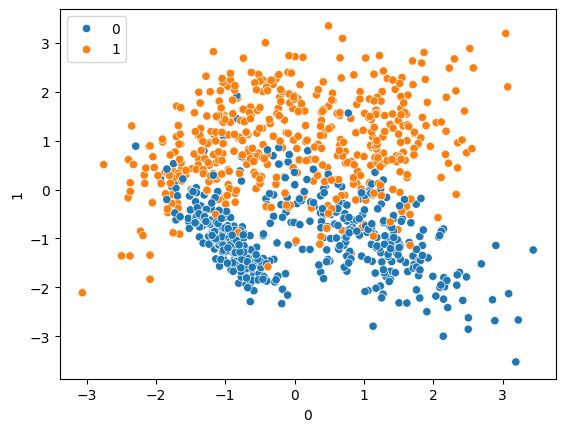

In [44]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

# Train test split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a best fit line using Linear SVC Algorithm for the above graph

- when data points are clearly separable use , the kernel attribute of SVC

In [46]:
from sklearn.svm import SVC
svc_obj = SVC(kernel="linear")

In [47]:
# fit on the training and test data 
# & transform only the training data

svc_obj.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
# Prediction

y_pred = svc_obj.predict(X_test)

# Compute Linear SVC Algo performance

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# we are getting 99% accuracy - which is very high - reason being the datapoints as seen in the graph were clearly separable, hence high accuracy.
# accuracy drops as the datapoints are overlapping

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       128
           1       0.88      0.88      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[114  14]
 [ 15 107]]


# For Overlapping data points in a dataset - 

we can use different types of kernels based on the dataset.
Types of kernels - 
1. RBF kernel
2. Polynomial kernels
3. Sigmoid Kernels

In [50]:
rbf_kernel = SVC(kernel='rbf')
rbf_kernel.fit(X_train, y_train)

SVC()

In [51]:
y_pred = rbf_kernel.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# accuracy dropped to 98% 
# to make / get more overlapping data points in the dataset -----> increase the value of eg. - n_clusters_per_class = 3, 4 etc...

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       128
           1       0.88      0.89      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[113  15]
 [ 14 108]]


# Trying with Polynomial kernel

In [52]:
polynomial_kernel = SVC(kernel='poly')
polynomial_kernel.fit(X_train, y_train)

y_pred = rbf_kernel.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       128
           1       0.88      0.89      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[113  15]
 [ 14 108]]


# Trying with Sigmoid Kernel

In [53]:
polynomial_kernel = SVC(kernel='sigmoid')
polynomial_kernel.fit(X_train, y_train)

y_pred = rbf_kernel.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       128
           1       0.88      0.89      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[113  15]
 [ 14 108]]


After deciding the best kernel ----> we can perform model hyperparameter tuning to improve the accuracy & performance